## Assignment 3

In [1]:
#using PyPlot
using Plots
using LinearAlgebra
using Printf

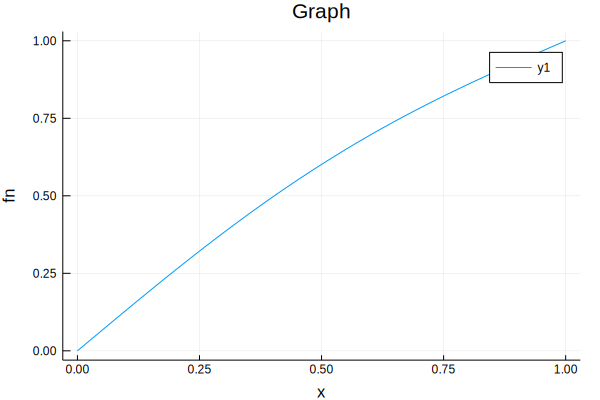

In [2]:
n = 100
x = (0:1/n:1)
y1 = 1/pi^2 .* sin.(pi*x) .+ x 
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title="Graph",linestyle=:solid)

### A5 : Write a Julia code that construct the mesh representation [p,e].

In [3]:
x = (0:1/n:1)
p = zeros(n+1,2)
e = zeros(Int64,n+1,2)
for i = 1:n
    p[i,1]=x[i]
    p[i,2]=x[i+1]
    e[i,1] = i
    e[i,2] = i + 1
end
c = [p,e]

2-element Array{Array{Float64,2},1}:
 [0.0 0.01; 0.01 0.02; … ; 0.99 1.0; 0.0 0.0]
 [1.0 2.0; 2.0 3.0; … ; 100.0 101.0; 0.0 0.0]

### A6:Write a Julia code that given the coordinate xi return as output the source function f(xi)

In [4]:
function f(x)
    sin(pi*x)
end

f (generic function with 1 method)

In [5]:
function S(x1,x2)
    S_e = [1 -1; -1 1]
    S_e = (1/(x2-x1))*S_e
    return S_e
end

S (generic function with 1 method)

### A8: Write a Julia code that given the coordinates xi and xi+1 of the end points of element e_i generates the 2 * 1 element vector f_ei

In [8]:
function f_e(x1,x2)
    f1 = f(x1)
    f2 = f(x2)
    fe = ((x2-x1)/2) * [f1;f2]
    return fe
end

f_e (generic function with 1 method)

In [9]:
function compute_A(n)
    A = zeros(n+1,n+1)
    x = (0:1/n:1)
    for i = 1:n
        S_e = S(x[i],x[i+1])
        for j = 1:2
            for k = 1:2
                A[e[i, j], e[i, k]] = A[e[i, j], e[i, k]] + S_e[j, k]
            end
        end
    end
    return A
end

compute_A (generic function with 1 method)

In [10]:
function compute_f_vec(n)
    f_vec_e = zeros(n+1,1)
    x = (0:1/n:1)
    for i = 1:n
        f_vec_ei = f_e(x[i],x[i+1])
        for j = 1:2
            f_vec_e[e[i, j]] = f_vec_e[e[i, j]] + f_vec_ei[j]
        end
    end
    return f_vec_e
end

compute_f_vec (generic function with 1 method)

In [11]:
A = compute_A(n)
f_vector = compute_f_vec(n)
# Set the boundary conditions
A[1, 1] = 1
A[1, 2] = 0
f_vector[1] = 0

0

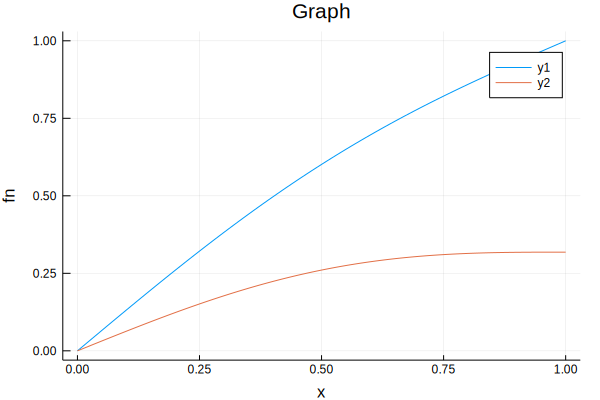

In [12]:
x = (0:1/n:1)
y1 = 1/pi^2 .* sin.(pi*x) .+ x 
u_h = A\f_vector
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title=" Graph",linestyle=:solid)
plot!(x,u_h)

In [13]:
function C(x)
    if x >= 0.5 && x < 0.75
        return 0.01
    end 
    return 1
end

C (generic function with 1 method)

In [14]:
function S(x1,x2)
    S_e = [1 -1; -1 1]
    S_e = (C(x1)/(x2-x1))*S_e
    return S_e
end

S (generic function with 1 method)

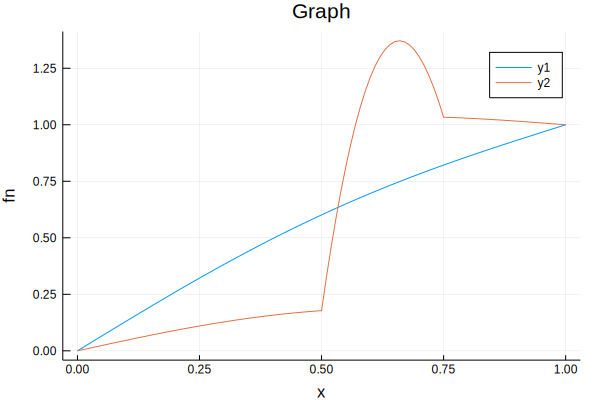

In [15]:
A = compute_A(n)
f_vector = compute_f_vec(n)
# Set the boundary conditions
A[1, 1] = 1
A[1, 2] = 0
f_vector[1] = 0
A[n+1, n+1] = 1
A[n+1, n] = 0
f_vector[n+1] = 1
x = (0:1/n:1)
y1 = 1/pi^2 .* sin.(pi*x) .+ x 
u_h = A\f_vector
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title=" Graph",linestyle=:solid)
plot!(x,u_h)

In [16]:
alpha = 5
function S(x1,x2)
    S_e = (1/(x2-x1))*[1 -1; -1 1] + (alpha*(x2-x1)/2) * [1 0;0 1] 
    return S_e
end

S (generic function with 1 method)

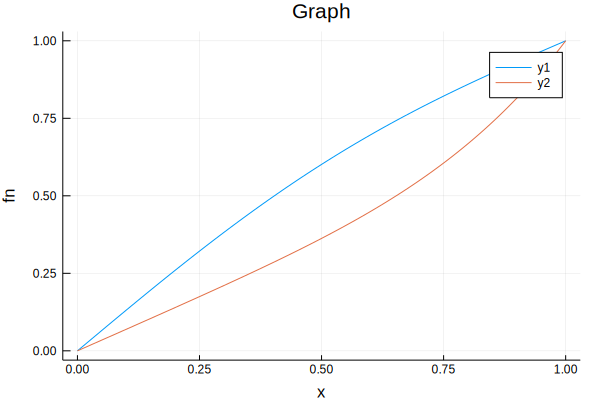

In [17]:
A = compute_A(n)
f_vector = compute_f_vec(n)
# Set the boundary conditions
A[1, 1] = 1
A[1, 2] = 0
f_vector[1] = 0
A[n+1, n+1] = 1
A[n+1, n] = 0
f_vector[n+1] = 1
x = (0:1/n:1)
y1 = 1/pi^2 .* sin.(pi*x) .+ x 
u_h = A\f_vector
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y1,xlabel = "x",ylabel = "fn",title=" Graph",linestyle=:solid)
plot!(x,u_h)

### A18 : Second Order Basis Function

In [18]:
x = (0:1/n:1)
p = zeros(n+1,3)
e = zeros(Int64,n+1,3)
for i = 1:n
    p[i,1] = x[i]
    p[i,2] = (x[i] + x[i+1])/2
    p[i,3] = x[i+1]
    
    if i==1
        e[i,1] = i
        e[i,2] = i + 1
        e[i,3] = i + 2
    end
    if i > 1
        e[i,1] = e[i-1,3]
        e[i,2] = e[i-1,3] + 1
        e[i,3] = e[i-1,3] + 2
    end
    
end
p = [x[1:end-1] (x[1:end-1]+x[2:end])/2 x[2:end]]
e = [1:2:n*2 2:2:n*2 3:2:n*2+1]
c = [p,e]

2-element Array{Array{Float64,2},1}:
 [0.0 0.005 0.01; 0.01 0.015 0.02; … ; 0.98 0.985 0.99; 0.99 0.995 1.0]
 [1.0 2.0 3.0; 3.0 4.0 5.0; … ; 197.0 198.0 199.0; 199.0 200.0 201.0]  

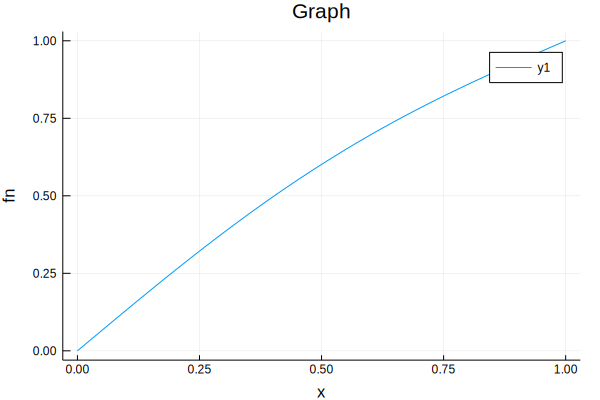

In [7]:
n = 100
x = [0; 1; rand(n-1)]
x = sort(x)
p = [x[1:end-1] (x[1:end-1]+x[2:end])/2 x[2:end]]
e = [1:2:n*2 2:2:n*2 3:2:n*2+1]
x = (0:1/n:1)
y_n = 1/pi^2 .* sin.(pi*x) .+ x 
# :auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
plot(x,y_n,xlabel = "x",ylabel = "fn",title="Graph",linestyle=:solid)

In [20]:
function f_der(x)
    sin(pi*x)
end

f_der (generic function with 1 method)

In [21]:
function compute_integral(a1,a2,b1,b2,x1,x2)
     return (4/3 * a1 * a2 * x2^3) + (a1*b2 + a2*b1)x2^2 + b1*b2*x2 - (4/3 * a1 * a2 * x1^3) + (a1*b2 + a2*b1)x1^2 + b1*b2*x1
end


compute_integral (generic function with 1 method)

In [22]:
function calc_coefficients(x1,x2,x3)
    mat_a = [x1^2 x1 1; x2^2 x2 1; x3^2 x3 1; ]
    vec_a = [1; 0; 0]
    coeff_a = mat_a\vec_a
    
    mat_b = [x1^2 x1 1; x2^2 x2 1; x3^2 x3 1; ]
    vec_b = [0; 1; 0]
    coeff_b = mat_b\vec_b
    
    mat_c = [x1^2 x1 1; x2^2 x2 1; x3^2 x3 1; ]
    vec_c = [0; 0; 1]
    coeff_c = mat_c\vec_c
    
    coeff_mat = [coeff_a[1] coeff_a[2] coeff_a[3]; coeff_b[1] coeff_b[2] coeff_b[3]; coeff_c[1] coeff_c[2] coeff_c[3]]
    return coeff_mat
end


calc_coefficients (generic function with 1 method)

In [23]:
function S_new(x1,x2,x3)
    coeff_mat = calc_coefficients(x1,x2,x3)
    S_e = [compute_integral(coeff_mat[1,1],coeff_mat[1,1],coeff_mat[1,2],coeff_mat[1,2],x1,x1) compute_integral(coeff_mat[1,1],coeff_mat[2,1],coeff_mat[1,2],coeff_mat[2,2],x1,x2) compute_integral(coeff_mat[1,1],coeff_mat[3,1],coeff_mat[1,2],coeff_mat[3,2],x1,x3);
           compute_integral(coeff_mat[1,1],coeff_mat[2,1],coeff_mat[1,2],coeff_mat[2,2],x1,x2) compute_integral(coeff_mat[2,1],coeff_mat[2,1],coeff_mat[2,2],coeff_mat[2,2],x2,x2) compute_integral(coeff_mat[2,1],coeff_mat[3,1],coeff_mat[2,2],coeff_mat[3,2],x2,x3);
           compute_integral(coeff_mat[3,1],coeff_mat[1,1],coeff_mat[3,2],coeff_mat[1,2],x1,x3) compute_integral(coeff_mat[3,1],coeff_mat[2,1],coeff_mat[3,2],coeff_mat[2,2],x2,x3) compute_integral(coeff_mat[3,1],coeff_mat[3,1],coeff_mat[3,2],coeff_mat[3,2],x3,x3)]
   return S_e
end


S_new (generic function with 1 method)

In [25]:
function f_new(x1,x2,x3)
    coeff_mat = calc_coefficients(x1,x2,x3)
    f1 = f_der(x1)
    f2 = f_der(x2)
    f3 = f_der(x3)
    fe = ((x3-x1)/6) * [f1 ;
                        f2 ;
                        f3 ]
    return fe
end


f_new (generic function with 1 method)

In [26]:
function compute_A_new(n)
    A_n = zeros(2n+1,2n+1)
    x = (0:1/n:1)
    for i = 1:n
        S_e_new = S_new(p[i,1], p[i,2], p[i,3])
        for j = 1:3
            for k = 1:3
                A_n[e[i, j], e[i, k]] = A_n[e[i, j], e[i, k]] + S_e_new[j, k]
            end
        end
    end
    return A_n
end

compute_A_new (generic function with 1 method)

In [27]:
function compute_f_vec_new(n)
    f_vec_e = zeros(2n+1,1)
    x = (0:1/n:1)
    for i = 1:n
        f_vec_ei = f_new(x[i], (x[i]+x[i+1])/2, x[i+1])
        for j = 1:3
            f_vec_e[e[i, j]] = f_vec_e[e[i, j]] + f_vec_ei[j]
        end
    end
    println(size(f_vec_e))
    return f_vec_e
end

compute_f_vec_new (generic function with 1 method)

In [36]:
x = [0; 1; rand(n-1)]
x = sort(x)

p = [x[1:end-1] (x[1:end-1]+x[2:end])/2 x[2:end]]
e = [1:2:n*2 2:2:n*2 3:2:n*2+1]

100×3 Array{Int64,2}:
   1    2    3
   3    4    5
   5    6    7
   7    8    9
   9   10   11
  11   12   13
  13   14   15
  15   16   17
  17   18   19
  19   20   21
  21   22   23
  23   24   25
  25   26   27
   ⋮          
 177  178  179
 179  180  181
 181  182  183
 183  184  185
 185  186  187
 187  188  189
 189  190  191
 191  192  193
 193  194  195
 195  196  197
 197  198  199
 199  200  201

In [37]:
#A.6
function f(x)
    sin(pi*x)
end


f (generic function with 1 method)

In [38]:
#A.7
function Φ₁(x, y, z)
    [x^2 x 1; y^2 y 1; z^2 z 1] \ [0; 0; 1]
end

Φ₁ (generic function with 1 method)

In [39]:
function Φ₂(x, y, z)
    [x^2 x 1; y^2 y 1; z^2 z 1] \ [0; 1; 0]
end

Φ₂ (generic function with 1 method)

In [40]:
function Φ₃(x, y, z)
    [x^2 x 1; y^2 y 1; z^2 z 1] \ [1; 0; 0]
end

Φ₃ (generic function with 1 method)

In [41]:
function S(x, y, z)
    cf = [Φ₁(x, y, z)[1:2] Φ₂(x, y, z)[1:2] Φ₃(x, y, z)[1:2]]
    dx³ = (z^3 - x^3) / 3
    dx² = (z^2 - x^2) / 2
    dx = (z - x)
    S = zeros(3,3)
    S[1,1:3] = [4*cf[1,1]^2*dx³ + 4*cf[1,1]*cf[2,1]*dx² + cf[2,1]^2*dx
                4*cf[1,1]*cf[1,2]*dx³ + 2*cf[1,1]*cf[2,2]*dx² + 2*cf[1,2]*cf[2,1]*dx² + cf[2,1]*cf[2,2]*dx
                4*cf[1,1]*cf[1,3]*dx³ + 2*cf[1,1]*cf[2,3]*dx² + 2*cf[1,3]*cf[2,1]*dx² + cf[2,1]*cf[2,3]*dx]

    S[2,1] = S[1,2]
    S[2,2:3] = [4*cf[1,2]^2*dx³ + 4*cf[1,2]*cf[2,2]*dx² + cf[2,2]^2*dx
                4*cf[1,2]*cf[1,3]*dx³ + 2*cf[1,2]*cf[2,3]*dx² + 2*cf[1,3]*cf[2,2]*dx² + cf[2,2]*cf[2,3]*dx]

    S[3,1] = S[1,3]
    S[3,2] = S[2,3]
    S[3,3] =    4*cf[1,3]^2*dx³ + 4*cf[1,3]*cf[2,3]*dx² + cf[2,3]^2*dx

    return S
end

println(S(0, 0.025, 0.05))


[46.6667 -53.3333 6.66667; -53.3333 106.667 -53.3333; 6.66667 -53.3333 46.6667]


In [42]:
#A.8
function fe(x, y, z)
    (z-x)/6 * [f(x); 4*f(y); f(z)]
end

fe (generic function with 1 method)

In [43]:
#A.9:
A = zeros(n*2+1, n*2+1)
for i in 1:n
    Si = S(p[i,1], p[i,2], p[i,3])
    for j in 1:3
        for k in 1:3
            A[e[i,j], e[i,k]] = A[e[i,j], e[i,k]] + Si[j, k]
        end
    end
end

In [44]:
#A.10
fv = zeros(n*2+1, 1)
for i = 1:n
    fvi = fe(p[i,1], p[i,2], p[i,3])
    for j = 1:3
        fv[e[i,j]] = fv[e[i,j]] + fvi[j]
    end
end

In [45]:
#A.11:
A[1,1] = 1
A[1,2] = 0
A[1,3] = 0
fv[1] = 0

A[end,end] = 1
A[end,end-1] = 0
A[end,end-2] = 0
fv[end] = 1

1

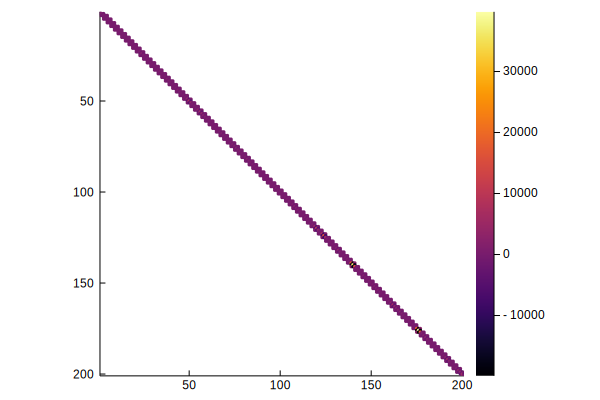

In [46]:
#A.12.
using SparseArrays
Plots.spy(sparse(A), markersize=2)

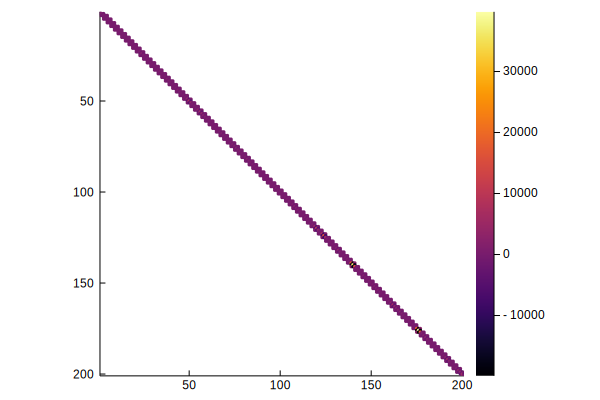

In [47]:
Plots.spy(sparse(A), markersize=2)

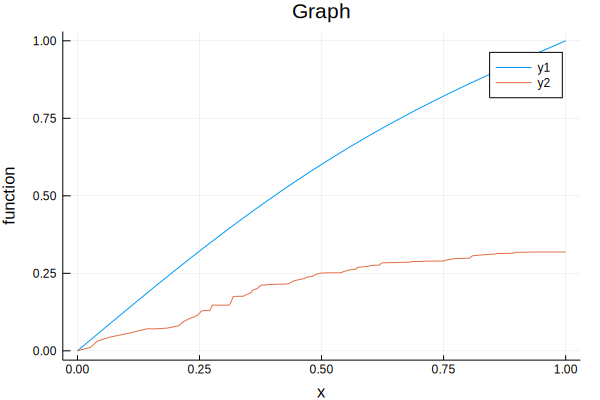

In [48]:
#A.13
uh = A\fv
x_p = zeros(n*2+1,1)
x_p[1:2:end-2] = p[:,1]
x_p[2:2:end] = p[:,2]
x_p[end] = p[end,3]
y2 = 1/pi^2 .* sin.(pi*x_p) .+ x_p 
plot(x_p,y2,xlabel = "x",ylabel = "function",title="Graph",linestyle=:solid)
plot!(x_p,u_h)